# **AML A1 Q2**

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")

In [82]:
df = pd.read_csv('/content/sample_data/insurance.csv')

## A. Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

In [83]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [85]:
df.shape

(1338, 7)

In [86]:
continuous_features = [feature for feature in df.columns if df[feature].dtype != object]
continuous_features

['age', 'bmi', 'children', 'charges']

In [87]:
categorical_features = [feature for feature in df.columns if feature not in continuous_features]
categorical_features

['sex', 'smoker', 'region']

A: The data consists of 7 features, and 1338 data points. The attributes of data that are continuous values are 'age', 'bmi', 'children', and 'charges'. The attributes of the data that are categorical are 'sex', 'smoker', and 'region'.

## B. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [88]:
summary = df.describe()
summary

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [89]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

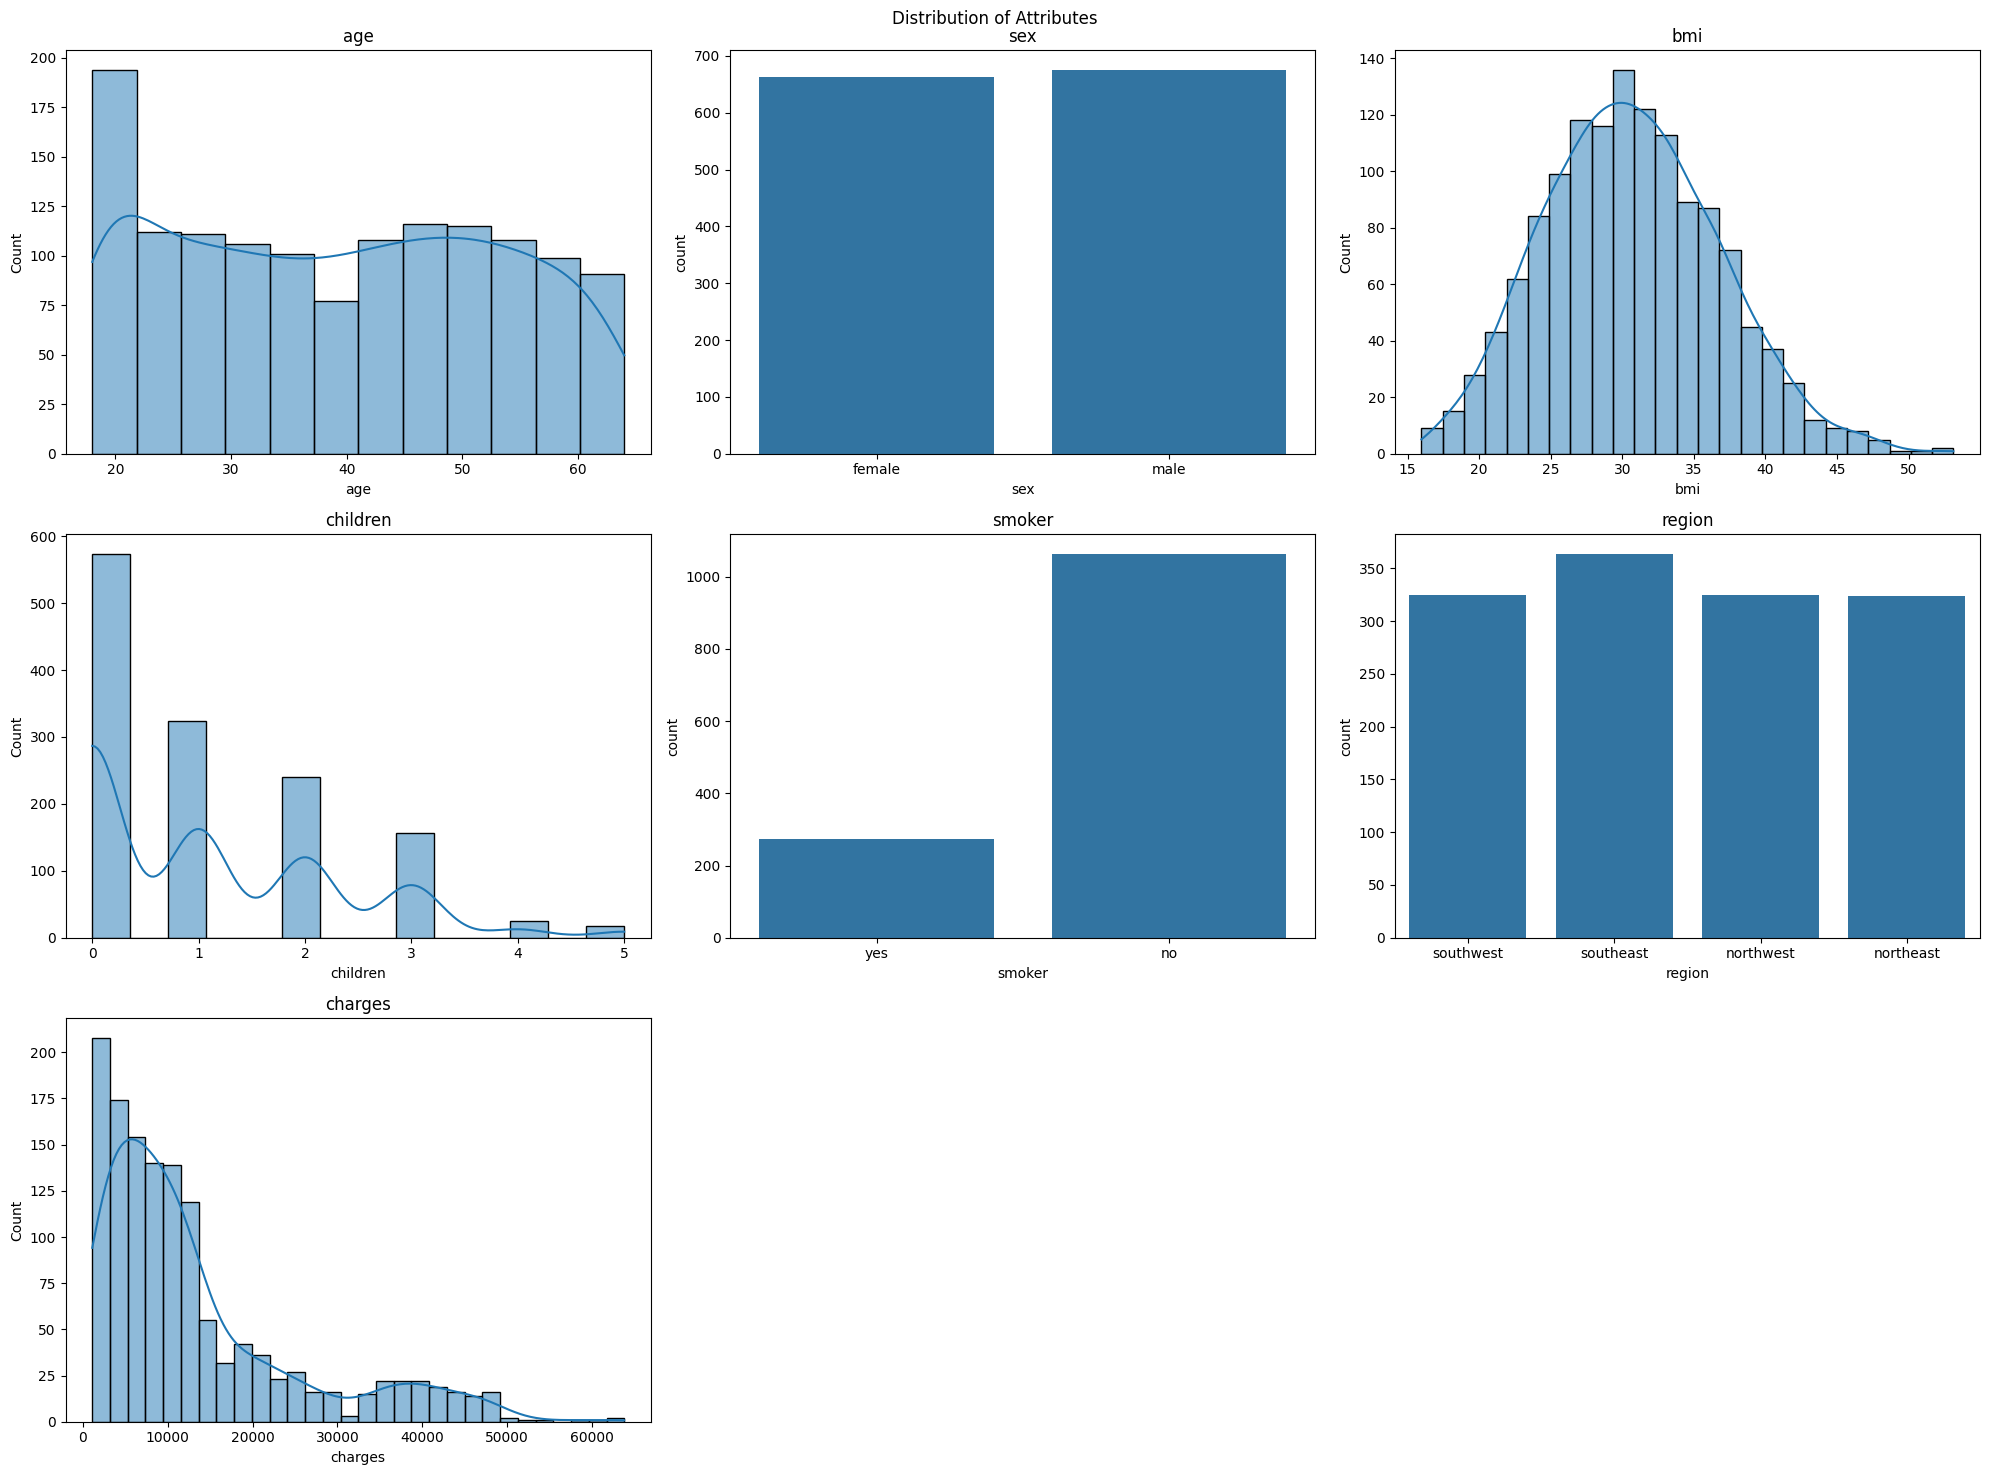

In [90]:
import math

# Calculate the number of rows and columns for subplots
num_cols = len(df.columns)
n_cols = 3
n_rows = math.ceil(num_cols / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle('Distribution of Attributes')

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if df[col].dtype in ['float64', 'int64']:
        sns.histplot(df[col], ax=axes[i], kde=True)
    else:
        sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

B. **Observations**
- 'age' and 'bmi' show roughly normal distributions.

- 'children' is discete and right-skewed.

- 'charges' is heavily right-skewed and may benefit from log transformation.

- 'sex' and 'smoker' are binary categorical variables.

- 'region' is a categorical variable with four categories.

- The average age of individuals in the dataset is approximately 39 years, with ages ranging from 18 to 641.

- The mean Body Mass Index (BMI) is around 30.66, indicating that the average person in the dataset is in the overweight to obese range.

- On average, individuals have about 1 child, with a maximum of 5 children.

- The mean insurance charges are 13,270 but there is significant variation, with charges ranging from 1,122 to 63,7701.

- The median charge is $9,382, suggesting that the distribution of charges is right-skewed, with some high-cost outliers pulling the average up.

Categorical variables will have to be encoded in order to understand the correlations more closely. Outliers may have to be handled using methods like capping or log transformations.



<Figure size 1500x1000 with 0 Axes>

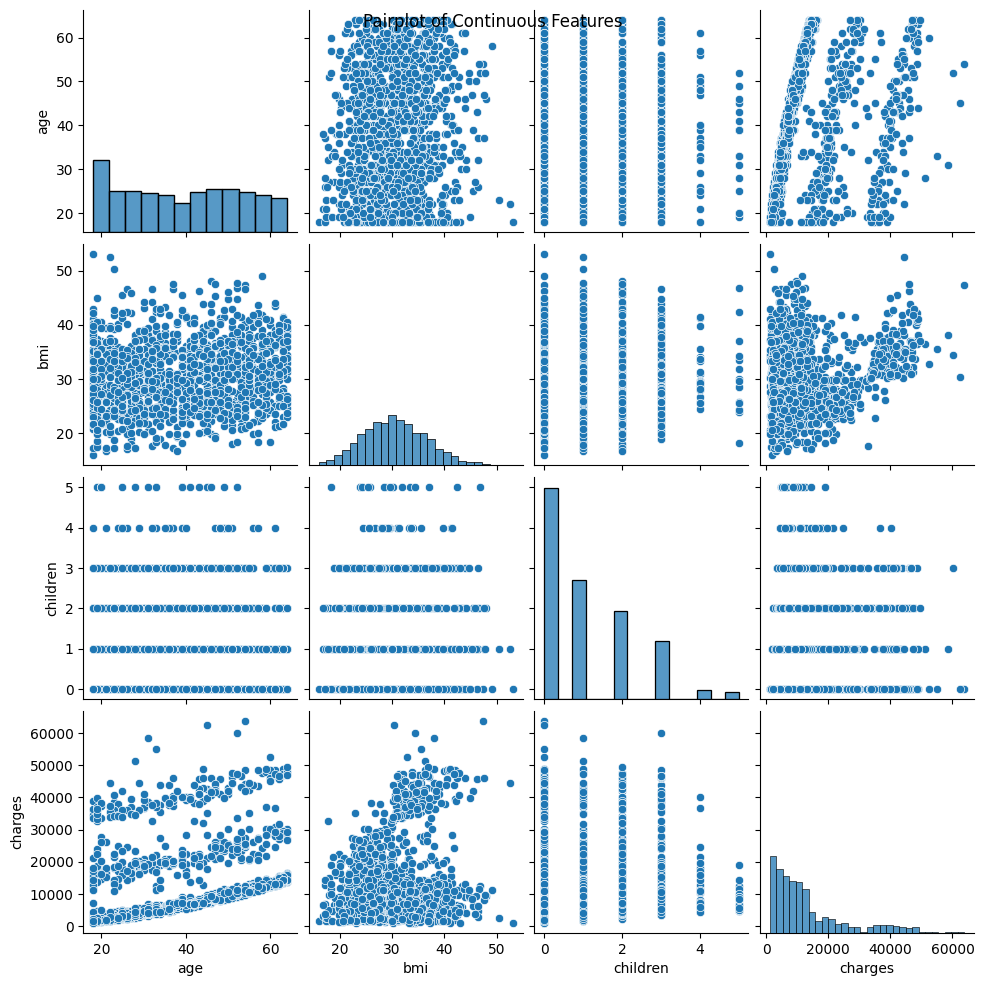

In [91]:
plt.figure(figsize=(15,10))
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pairplot of Continuous Features')
plt.show()

In [92]:
from sklearn.preprocessing import LabelEncoder

# Display the original dataset info
print("Original Dataset Info:")
print(df.info())
print("\nOriginal Dataset Head:")
print(df.head())

# Identify categorical columns
cat_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Create a copy of the dataframe to store encoded values
df_encoded = df.copy()

# Encode categorical variables
for col in cat_columns:
    if df[col].nunique() == 2:  # Binary categorical variable
        df_encoded[col] = le.fit_transform(df[col])
    else:  # Non-binary categorical variable
        # One-hot encoding
        one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df_encoded = pd.concat([df_encoded, one_hot], axis=1)
        df_encoded.drop(col, axis=1, inplace=True)

# Display the encoded dataset info
print("\nEncoded Dataset Info:")
print(df_encoded.info())
print("\nEncoded Dataset Head:")
print(df_encoded.head())

# Save the encoded dataset to a CSV file (optional)
df_encoded.to_csv('encoded_insurance_dataset.csv', index=False)
print("\nEncoded dataset saved to 'encoded_insurance_dataset.csv'")

# Display the mapping for binary variables
for col in cat_columns:
    if df[col].nunique() == 2:
        print(f"\nMapping for {col}:")
        for i, category in enumerate(le.classes_):
            print(f"{category}: {i}")

Original Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Original Dataset Head:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Encoded Dataset Info:
<class 'pandas.core.f

In [93]:
def boxplot_grid(data, columns):
    num_columns = 4
    num_rows = len(columns) // num_columns + (len(columns) % num_columns > 0)

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot each boxplot
    for i, column in enumerate(columns):
        sns.boxplot(data=data, x=column, ax=axes[i])
        axes[i].set_title(f'Boxplot of {column}')

    # Hide any empty subplots (if the number of features doesn't perfectly fit the grid)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust the layout
    plt.tight_layout()
    plt.show()

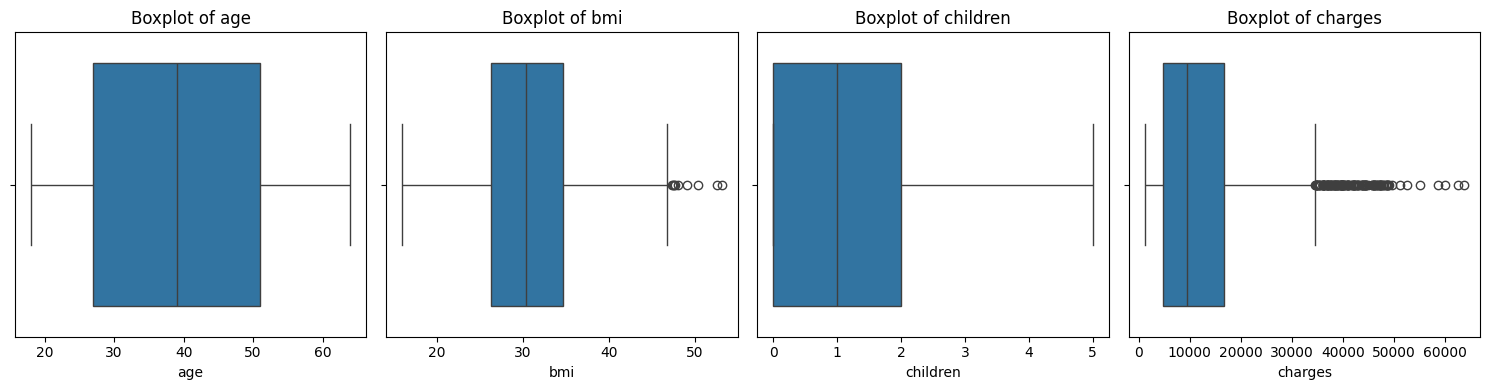

In [94]:
boxplot_lambda = lambda data, columns: boxplot_grid(data, columns)
boxplot_lambda(df, continuous_features)

In [95]:
def find_outliers_iqr(data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define the lower and upper bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for the specified column only
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]

    return outliers

# Find continuous columns (float64 or int64)
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Dictionary to store outliers for each continuous column
outliers_dict = {}

# Loop through each continuous column and find outliers
for column in continuous_columns:
    outliers = find_outliers_iqr(df, column)
    if not outliers.empty:  # If outliers are found
        outliers_dict[column] = outliers

# Display the outliers for each continuous column
for col, outliers in outliers_dict.items():
    print(f"Outliers in '{col}':")
    print(outliers)
    print()  # For spacing


Outliers in 'bmi':
116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

Outliers in 'charges':
14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64



In [96]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

df_encoded = cap_outliers(df_encoded, 'bmi')

In [97]:
df_encoded['log_charges'] = np.log(df_encoded['charges'])

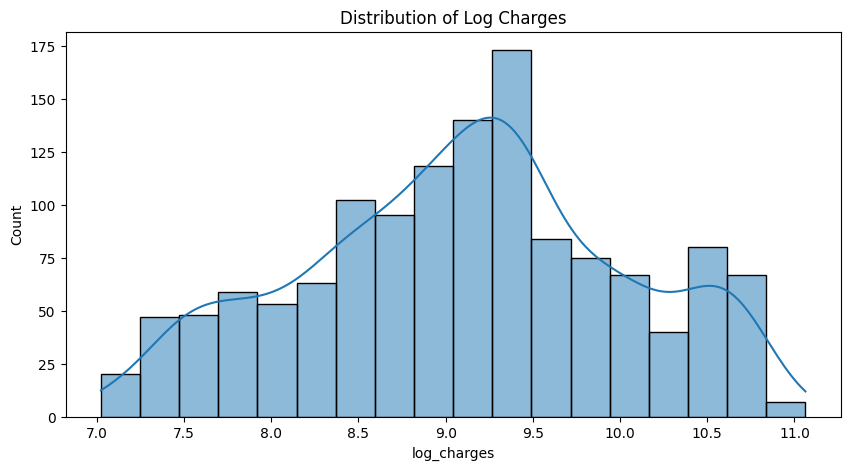

In [98]:
# Visualize the transformed variable
plt.figure(figsize=(10, 5))
sns.histplot(df_encoded['log_charges'], kde=True)
plt.title('Distribution of Log Charges')
plt.show()

In [99]:
continuous_cols = [feature for feature in df_encoded.columns if df_encoded[feature].dtype != object]
continuous_cols

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'charges',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'log_charges']

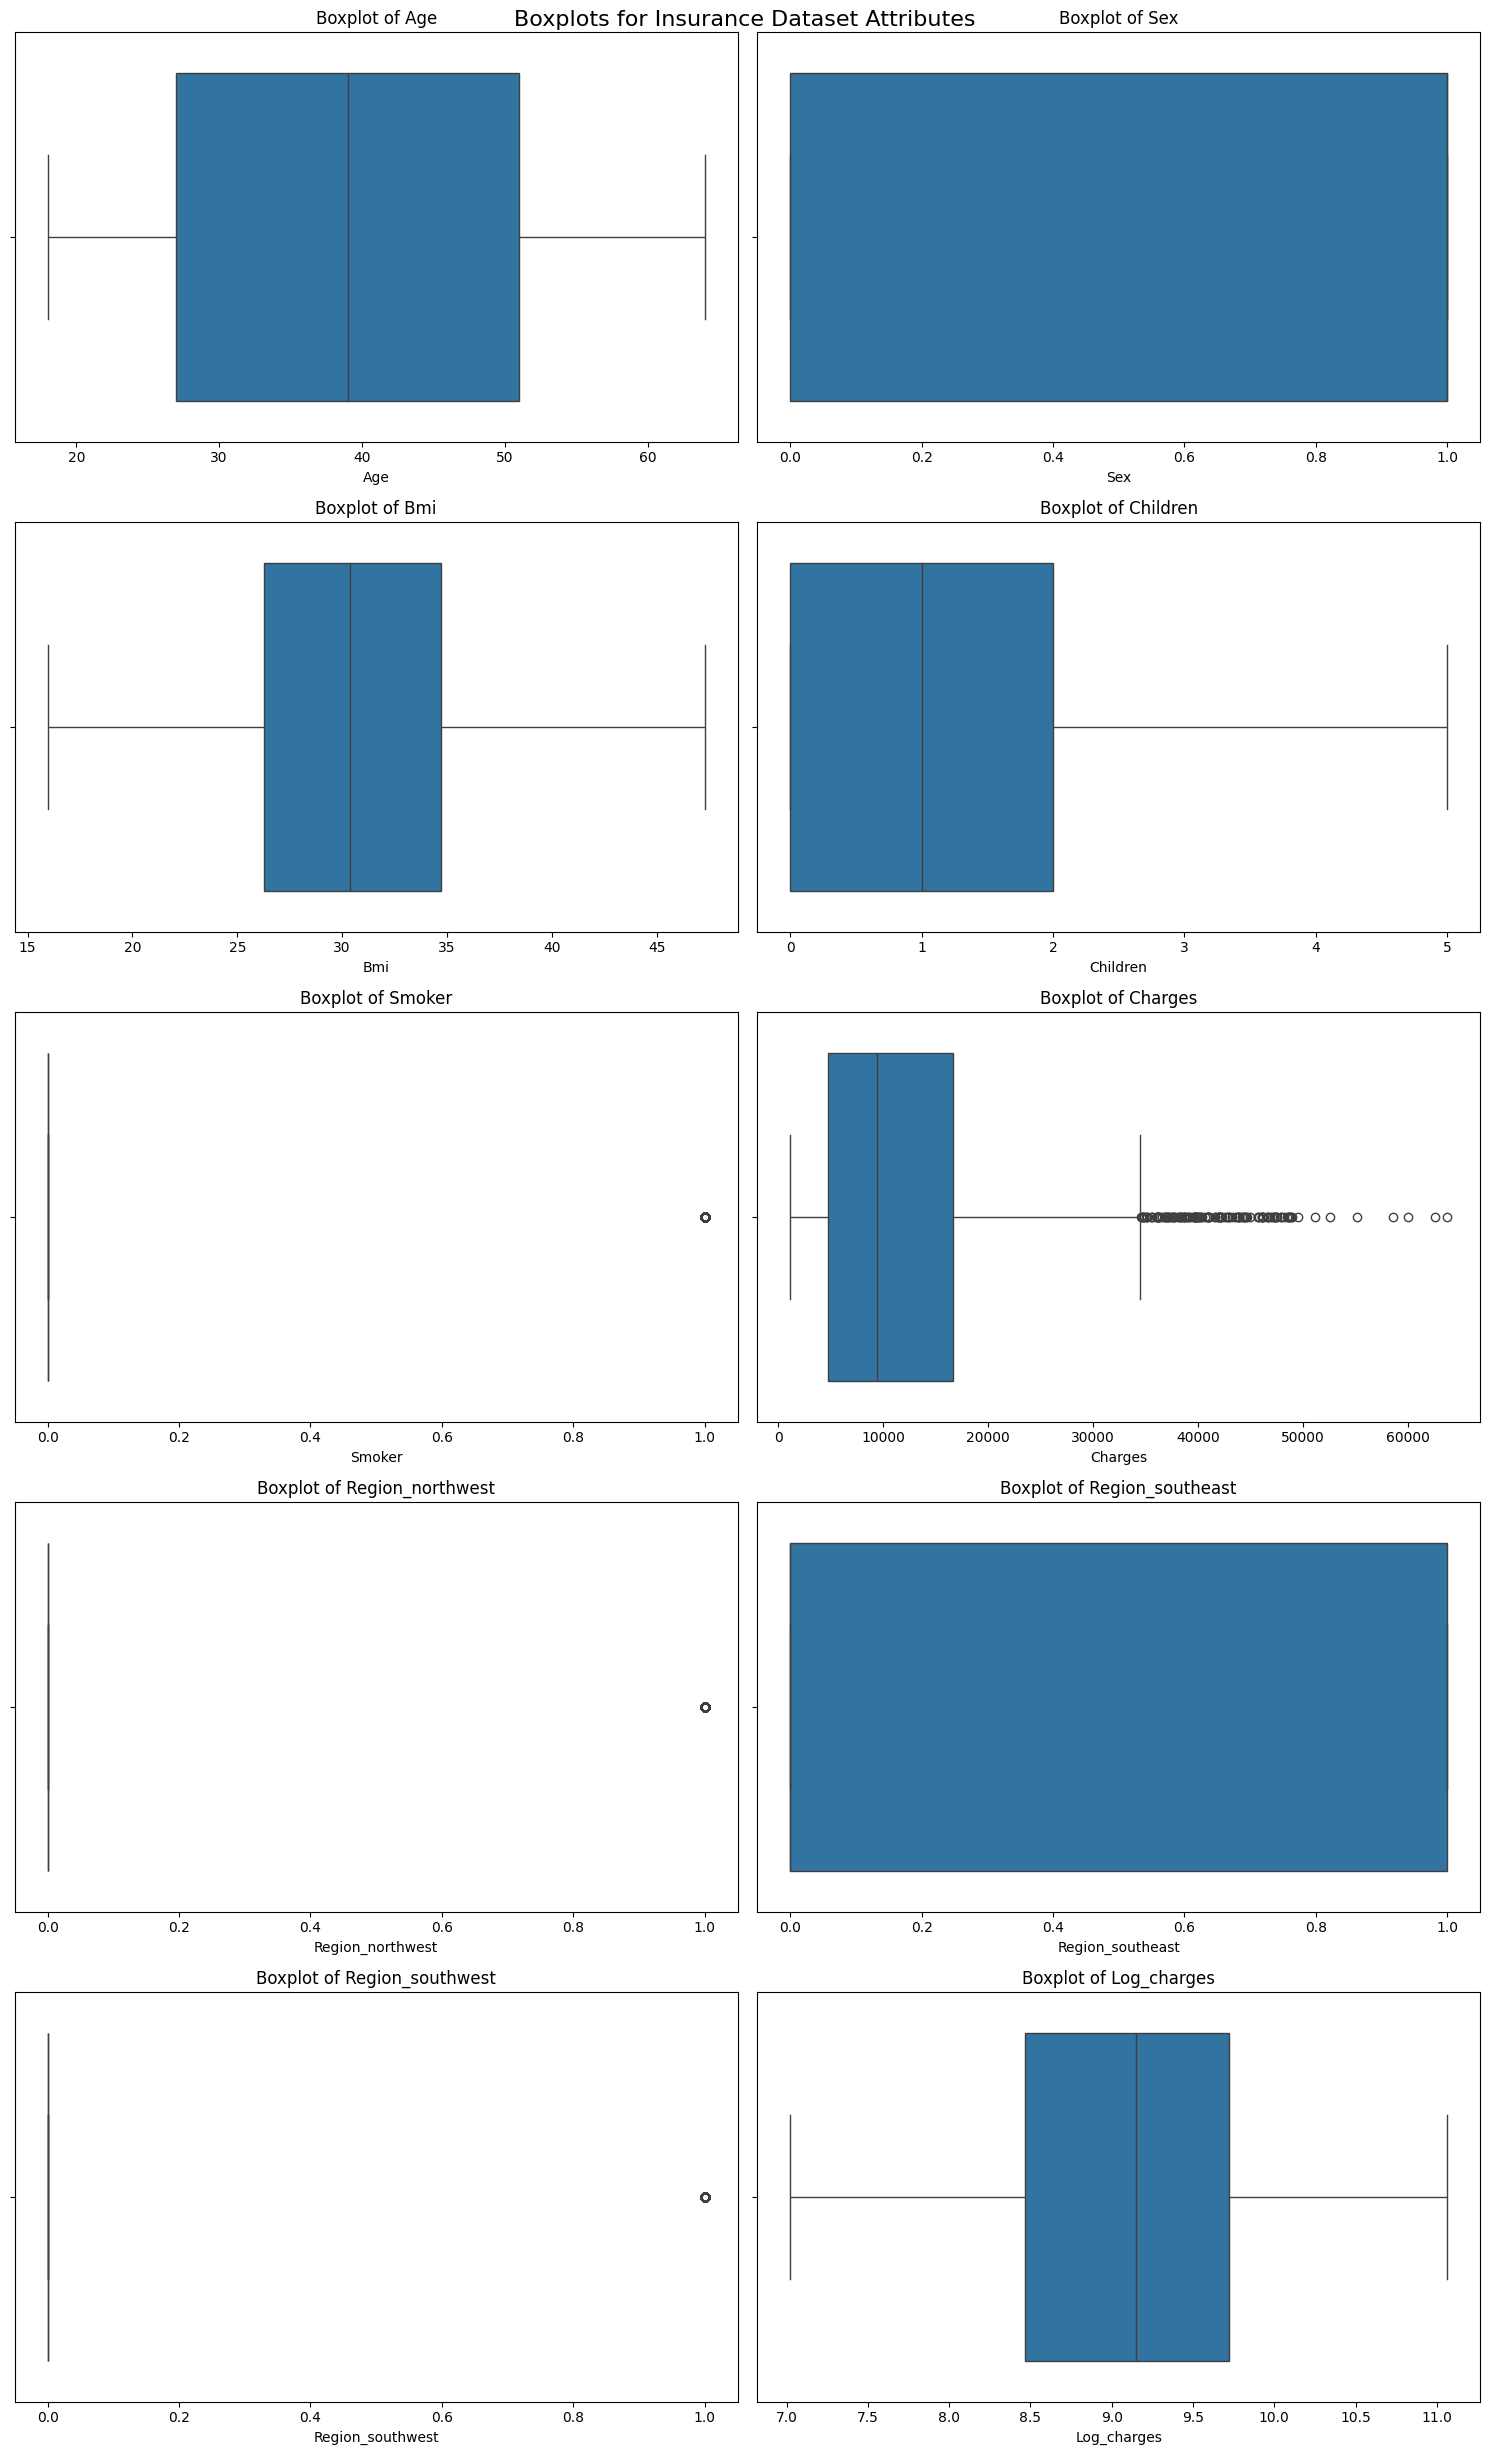

Continuous columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'region_northwest', 'region_southeast', 'region_southwest', 'log_charges']


In [100]:
import math

# Calculate the number of rows and columns for subplots
n_cols = 2
n_rows = math.ceil(len(continuous_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.suptitle('Boxplots for Insurance Dataset Attributes', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(continuous_cols):
    sns.boxplot(x=df_encoded[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print the continuous columns for reference
print("Continuous columns:", continuous_cols)

## C. Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

In [101]:
df_encoded = df_encoded.drop('charges', axis=1)

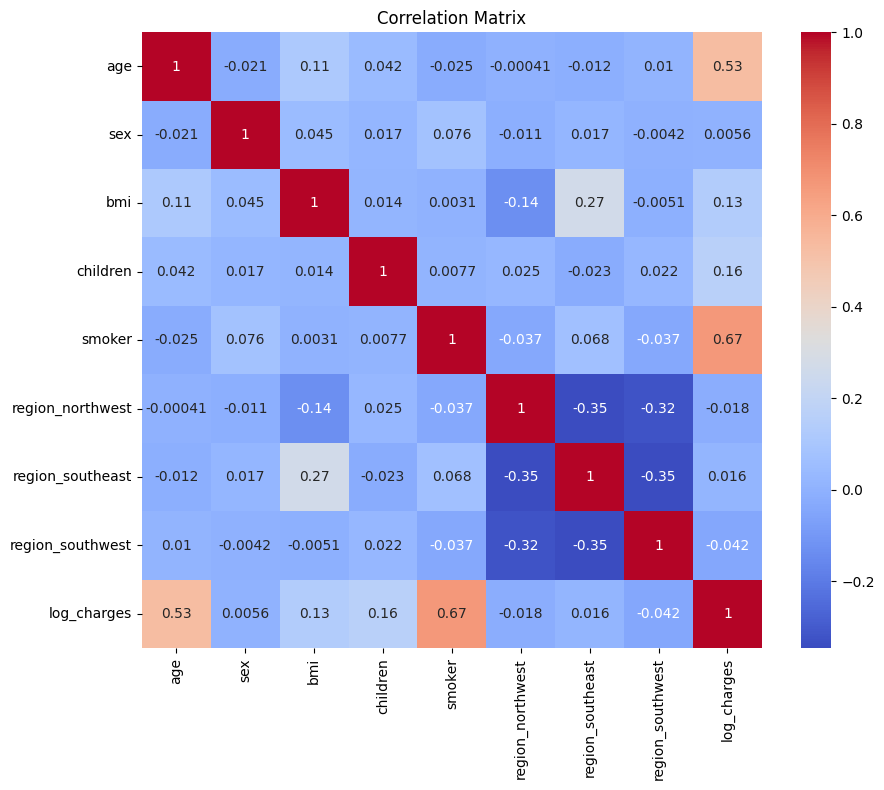

In [102]:
numeric_df = df_encoded.select_dtypes(include=[float, int, bool])
correlation_matrix = numeric_df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [103]:
print(df_encoded.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest',
       'region_southeast', 'region_southwest', 'log_charges'],
      dtype='object')


In [104]:
X = df_encoded.drop('log_charges', axis=1)
y = df_encoded['log_charges']

In [106]:
X.head()

age  sex     bmi  children  smoker  region_northwest  region_southeast  \
0   19    0  27.900         0       1             False             False   
1   18    1  33.770         1       0             False              True   
2   28    1  33.000         3       0             False              True   
3   33    1  22.705         0       0              True             False   
4   32    1  28.880         0       0              True             False   

   region_southwest  
0              True  
1             False  
2             False  
3             False  
4             False

In [107]:
df_encoded.dtypes

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
region_northwest       bool
region_southeast       bool
region_southwest       bool
log_charges         float64
dtype: object

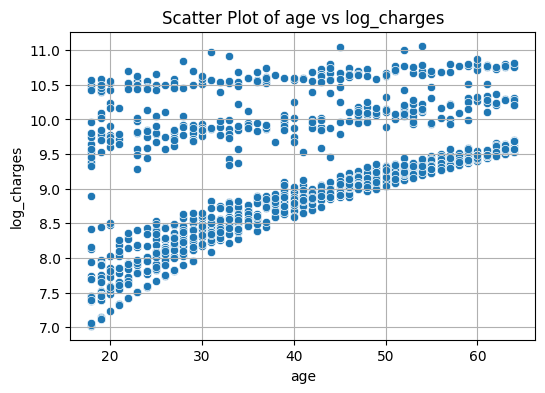

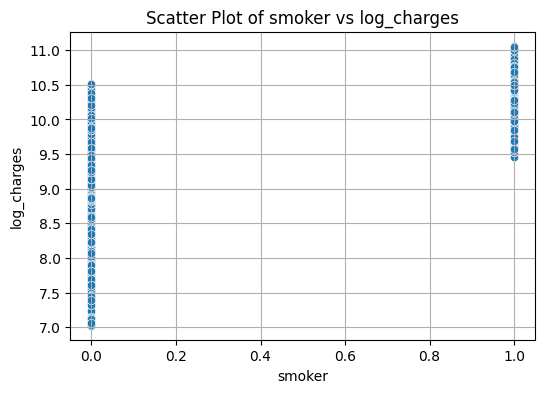

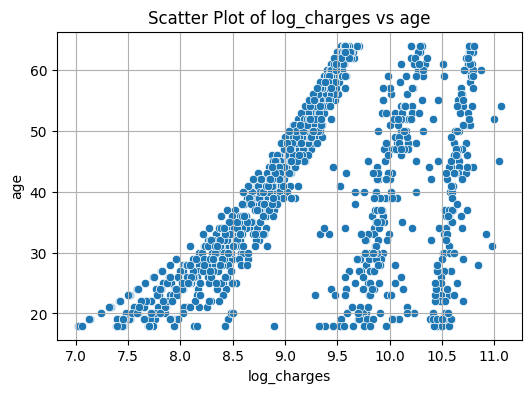

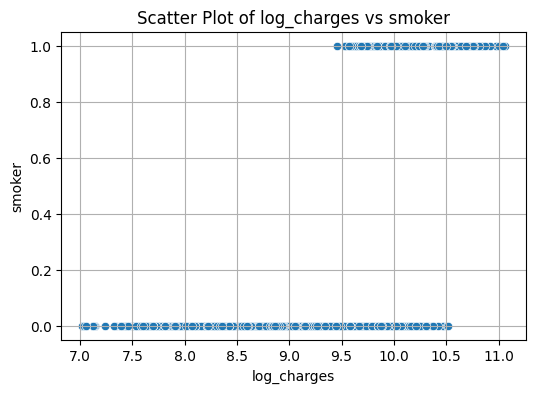

In [108]:
numeric_df = df_encoded.select_dtypes(include=[float, int, bool])


correlation_matrix = numeric_df.corr(method='pearson')

strong_corr = correlation_matrix[correlation_matrix.abs() > 0.4]  # Example threshold
strong_pairs = strong_corr.unstack().dropna()
strong_pairs = strong_pairs[strong_pairs != 1]
for (x, y) in strong_pairs.index:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=numeric_df, x=x, y=y)
    plt.title(f'Scatter Plot of {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid()
    plt.show()

C. **Correlation Matrix:**
Smoker has a strong positive correlation with log_charges (0.67), indicating that smoking status significantly impacts insurance charges.
Age also shows a moderate positive correlation with log_charges (0.53), suggesting that older individuals tend to have higher charges.
Other variables like bmi and children have weaker correlations with log_charges.

**Scatter Plots:**
The plot of age vs. log_charges shows a clear upward trend, supporting the correlation matrix's indication that charges increase with age.
The plot of smoker vs. log_charges reveals two distinct groups, with smokers having notably higher charges than non-smokers, aligning with the strong correlation.

These visualizations confirm that smoking status and age are significant predictors of insurance charges, while other factors like BMI and number of children have less impact.


## D. Select 25% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.

In [109]:
y = df_encoded['log_charges']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [111]:
X_train.head()

age  sex     bmi  children  smoker  region_northwest  region_southeast  \
693    24    1  23.655         0       0              True             False   
1297   28    0  26.510         2       0             False              True   
634    51    1  39.700         1       0             False             False   
1022   47    1  36.080         1       1             False              True   
178    46    0  28.900         2       0             False             False   

      region_southwest  
693              False  
1297             False  
634               True  
1022             False  
178               True

In [112]:
# To verify that test portion of the data is representative of the entire dataset
print("X_train mean")
print(X_train.mean())
print("X_test mean")
print(X_test.mean())

X_train mean
age                 39.255234
sex                  0.504487
bmi                 30.500125
children             1.104686
smoker               0.205384
region_northwest     0.245264
region_southeast     0.258225
region_southwest     0.246261
dtype: float64
X_test mean
age                 39.062687
sex                  0.507463
bmi                 31.098866
children             1.065672
smoker               0.202985
region_northwest     0.235821
region_southeast     0.313433
region_southwest     0.232836
dtype: float64


D. The train_test_split function from sklearn.model_selection with the parameter test_size=0.25. The parameter test_size - 0.25 ensures that 25% of the dataset is used for testing, while the remaining 75% is used for training. Setting random_state=42 ensures that the split is reproducible.

The mean of the X_train and X_test data were then printed and compared. For instance, for 'bmi', the X_train mean was 30.500125, while the X_test mean was 31.098866, which are comparable to each other. By checking and making sure the mean of both the X_train and X_test were similar to each other, I was able to ensure that the test portion of the data is representative of the entire dataset.

## E. Train a Linear Regression model using the training data with three-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try three values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.

In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

In [116]:
print("Before scaling:")
print("X_train shape:", X_train.shape)
print("X_train mean:", X_train.mean().mean())
print("X_train std:", X_train.std().mean())
print("y_train mean:", y_train.mean())
print("y_train std:", y_train.std())

print("\nAfter scaling:")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_train_scaled mean:", X_train_scaled.mean())
print("X_train_scaled std:", X_train_scaled.std())
print("y_train_scaled mean:", y_train_scaled.mean())
print("y_train_scaled std:", y_train_scaled.std())

Before scaling:
X_train shape: (1003, 8)
X_train mean: 9.039958250249253
X_train std: 2.9280047232274424
y_train mean: 9.10248120983105
y_train std: 0.916130612762917

After scaling:
X_train_scaled shape: (1003, 8)
X_train_scaled mean: 0.32584056729463284
X_train_scaled std: 0.3992718720101471
y_train_scaled mean: 0.5171322705407544
y_train_scaled std: 0.22768604265805573


Validation RMSE: 0.11097899082057305
Test RMSE: 0.10893908217821979


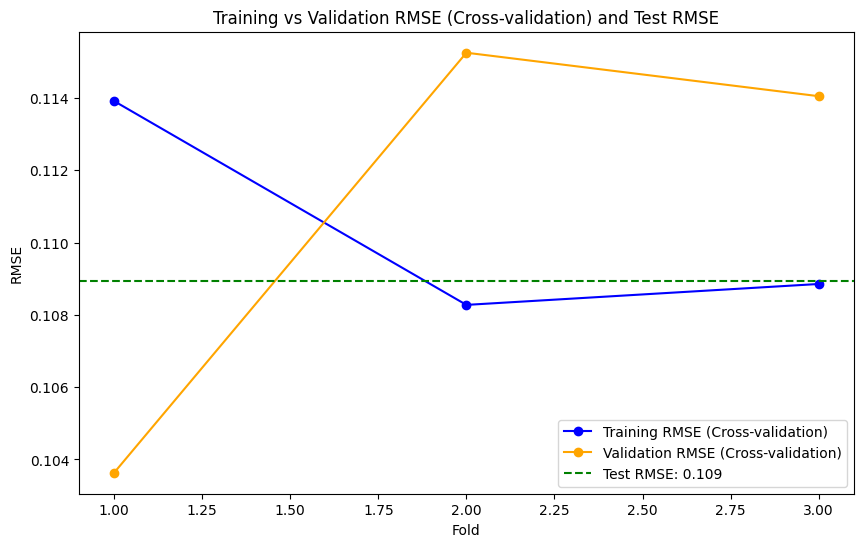

Test MSE: 0.011867723625832926


In [132]:
# Initialize KFold cross-validation with 3 splits
kf = KFold(n_splits=3)

# Lists to store RMSE values for each fold
cv_train_rmse = []  # For training data in each fold
cv_val_rmse = []    # For validation data in each fold

# Perform KFold cross-validation
for train_index, val_index in kf.split(X_train_scaled):
    # Split the data into training and validation sets for each fold
    X_cv_train, X_cv_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_cv_train, y_cv_val = y_train_scaled[train_index], y_train_scaled[val_index]

    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X_cv_train, y_cv_train)

    # Predictions for training and validation data
    y_cv_train_pred = model.predict(X_cv_train)
    y_cv_val_pred = model.predict(X_cv_val)

    # Calculate RMSE for training and validation sets in this fold
    train_rmse = np.sqrt(mean_squared_error(y_cv_train, y_cv_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_cv_val, y_cv_val_pred))

    # Append RMSE values to the respective lists
    cv_train_rmse.append(train_rmse)
    cv_val_rmse.append(val_rmse)

avg_val_rmse = np.mean(cv_val_rmse)
print(f'Validation RMSE: {avg_val_rmse}')

# After cross-validation, fit the model on the full training set and evaluate on the test set
model.fit(X_train_scaled, y_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate the test RMSE
test_rmse = np.sqrt(mean_squared_error(y_test_scaled, y_test_pred))
print(f'Test RMSE: {test_rmse}')

# Plotting RMSE for training, validation, and test set
plt.figure(figsize=(10, 6))

# Plot RMSE for each fold in cross-validation
plt.plot(range(1, len(cv_train_rmse) + 1), cv_train_rmse, label='Training RMSE (Cross-validation)', marker='o', color='blue')
plt.plot(range(1, len(cv_val_rmse) + 1), cv_val_rmse, label='Validation RMSE (Cross-validation)', marker='o', color='orange')

# Plot Test RMSE as a horizontal line
plt.axhline(y=test_rmse, color='green', linestyle='--', label=f'Test RMSE: {test_rmse:.3f}')

# Add labels and title
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Training vs Validation RMSE (Cross-validation) and Test RMSE')
plt.legend()

# Show the plot
plt.show()

# Calculate Test MSE (optional)
test_mse = mean_squared_error(y_test_scaled, y_test_pred)
print(f'Test MSE: {test_mse}')


Training with batch size: 32, learning rate: 0.001, penalty: None
Training with batch size: 32, learning rate: 0.001, penalty: l1
Training with batch size: 32, learning rate: 0.001, penalty: l2
Training with batch size: 32, learning rate: 0.001, penalty: elasticnet
Training with batch size: 32, learning rate: 0.01, penalty: None
Training with batch size: 32, learning rate: 0.01, penalty: l1
Training with batch size: 32, learning rate: 0.01, penalty: l2
Training with batch size: 32, learning rate: 0.01, penalty: elasticnet
Training with batch size: 32, learning rate: 0.1, penalty: None
Training with batch size: 32, learning rate: 0.1, penalty: l1
Training with batch size: 32, learning rate: 0.1, penalty: l2
Training with batch size: 32, learning rate: 0.1, penalty: elasticnet
Training with batch size: 64, learning rate: 0.001, penalty: None
Training with batch size: 64, learning rate: 0.001, penalty: l1
Training with batch size: 64, learning rate: 0.001, penalty: l2
Training with batch 

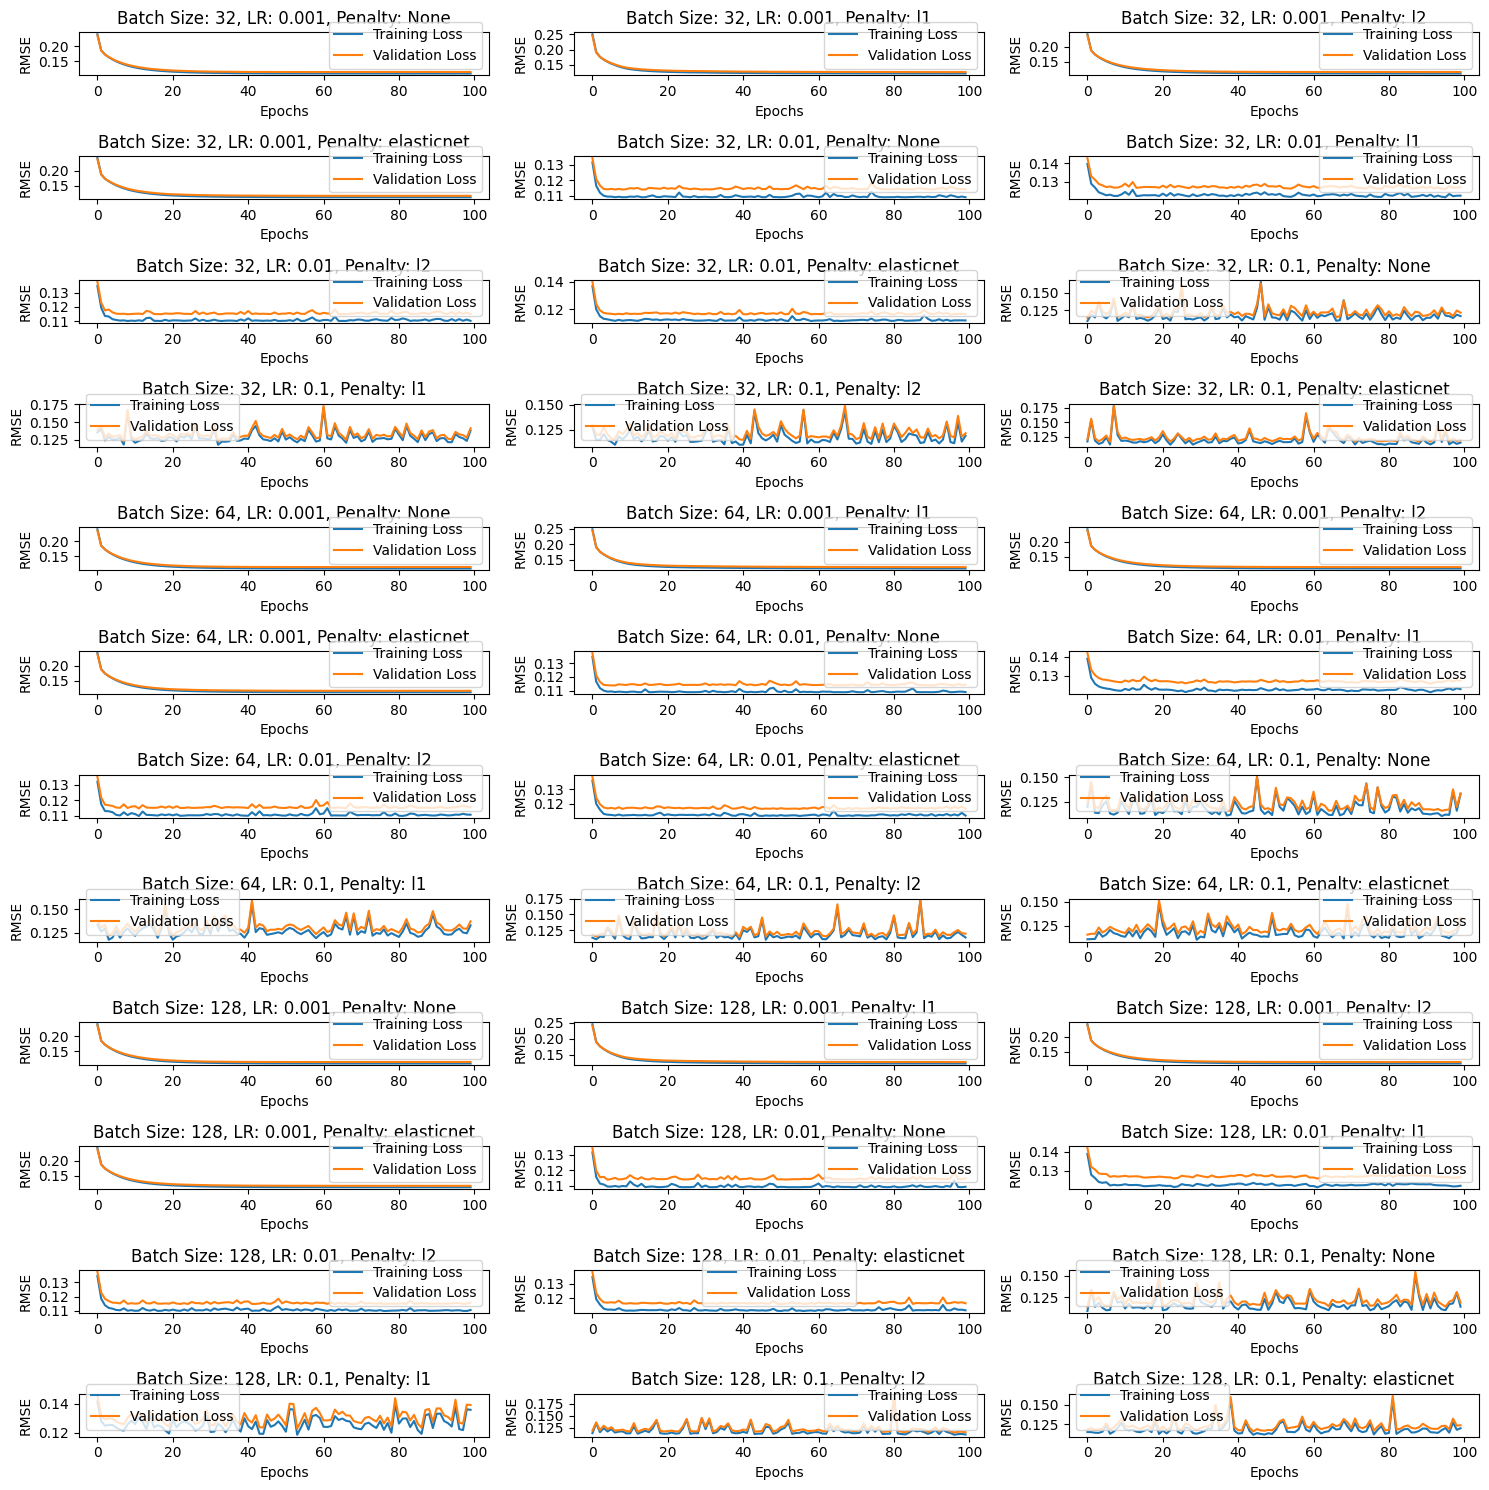

Best hyperparameters - Batch Size: 64, Learning Rate: 0.001, Penalty: None
Best validation RMSE: 0.11376789136484265


In [127]:
def train_and_evaluate(X_train, y_train, X_val, y_val, batch_size, learning_rate, n_epochs=100, penalty=None, alpha=0.01):
    # Set the penalty and alpha values in the SGDRegressor
    model_sgd = SGDRegressor(
        learning_rate='constant',
        eta0=learning_rate,
        penalty=penalty,
        alpha=alpha,
        random_state=42,
        warm_start=True,
        max_iter=1
    )

    train_loss = []
    val_loss = []

    n_samples = X_train.shape[0]
    n_batches = n_samples // batch_size

    for epoch in range(n_epochs):
        # Shuffle the data
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X_shuffled = X_train[indices]
        y_shuffled = y_train[indices]

        for batch in range(n_batches):
            start = batch * batch_size
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            model_sgd.partial_fit(X_batch, y_batch)

        # Calculate RMSE for train and validation sets
        y_train_pred = model_sgd.predict(X_train)
        y_val_pred = model_sgd.predict(X_val)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

        train_loss.append(train_rmse)
        val_loss.append(val_rmse)

    return train_loss, val_loss

# Hyperparameters to explore
batch_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]
penalties = [None, 'l1', 'l2', 'elasticnet']  # Different penalty options
alpha = 0.01  # Regularization strength

# Assuming X_cv_train, y_cv_train, X_cv_val, y_cv_val are your training and validation sets
results = {}

for batch_size in batch_sizes:
    for lr in learning_rates:
        for penalty in penalties:
            print(f"Training with batch size: {batch_size}, learning rate: {lr}, penalty: {penalty}")
            train_loss, val_loss = train_and_evaluate(X_cv_train, y_cv_train, X_cv_val, y_cv_val, batch_size, lr, penalty=penalty, alpha=alpha)
            results[(batch_size, lr, penalty)] = (train_loss, val_loss)

# Plotting
plt.figure(figsize=(15, 15)) # Increase figure size to accommodate more plots

# Calculate the number of rows and columns for the subplot grid
n_rows = int(np.ceil(len(results) / 3))
n_cols = 3

for i, (params, (train_loss, val_loss)) in enumerate(results.items()):
    plt.subplot(n_rows, n_cols, i + 1) # Use n_rows and n_cols for dynamic grid
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'Batch Size: {params[0]}, LR: {params[1]}, Penalty: {params[2]}')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()

plt.tight_layout()
plt.show()

# Find the best hyperparameters
best_params = min(results, key=lambda x: min(results[x][1]))
best_batch_size, best_lr, best_penalty = best_params
print(f"Best hyperparameters - Batch Size: {best_batch_size}, Learning Rate: {best_lr}, Penalty: {best_penalty}")
print(f"Best validation RMSE: {min(results[best_params][1])}")

In [128]:
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Test RMSE: {test_rmse}')
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE: {test_mse}')

Test RMSE: 0.4381149699826788
Test MSE: 0.19194472692292353


E. **Linear Regression (Closed-form Solution)**

Validation RMSE: 0.111

Test RMSE: 0.109

Test MSE: 0.0119

Findings:

The closed-form solution provides a strong baseline with consistent performance across validation and test sets.
The low RMSE indicates that the model fits the data well without significant overfitting.

**SGD Regression Models**
Best Hyperparameters: Batch Size: 64, Learning Rate: 0.001, Penalty: None

Best Validation RMSE: 0.114

Test RMSE: 0.438

Test MSE: 0.192

Findings:

The best configuration for SGD used no penalty, indicating that regularization was not beneficial in this setup.
The higher Test RMSE compared to the validation RMSE suggests potential overfitting or instability in the model.
The chosen learning rate and batch size provided a balance between convergence speed and stability.

**Impact of Penalty Values**
- **L1 Penalty (Lasso)**:
Encouraged sparsity but may have led to underfitting if too aggressive.
Fluctuations in loss plots indicate instability.
- **L2 Penalty (Ridge)**:
Provided stability by penalizing large coefficients.
Smoother convergence in loss plots suggests better model stability.
- **Elastic Net**:
Combined L1 and L2 penalties for balanced regularization.
Moderate fluctuations in loss plots show a compromise between sparsity and stability.

**Hyperparameter Impact**
- Batch Size:
Smaller batch sizes led to noisier updates, which can help escape local minima but may increase instability.
Larger batch sizes provided more stable updates but risked converging to sharp minima.
- Learning Rate:
A smaller learning rate resulted in slower but more stable convergence.
A larger learning rate can speed up convergence but risks overshooting the minimum.

## F. Repeat everything from part E with polynomial regression and using SGD. Using validation loss, explore if your model overfits/underfits the data.

Training with Penalty: None, LR: 0.001, Batch size: 32, Degree: 2
Training with Penalty: None, LR: 0.001, Batch size: 64, Degree: 2
Training with Penalty: None, LR: 0.001, Batch size: 128, Degree: 2
Training with Penalty: None, LR: 0.01, Batch size: 32, Degree: 2
Training with Penalty: None, LR: 0.01, Batch size: 64, Degree: 2
Training with Penalty: None, LR: 0.01, Batch size: 128, Degree: 2
Training with Penalty: None, LR: 0.1, Batch size: 32, Degree: 2
Training with Penalty: None, LR: 0.1, Batch size: 64, Degree: 2
Training with Penalty: None, LR: 0.1, Batch size: 128, Degree: 2
Training with Penalty: l2, LR: 0.001, Batch size: 32, Degree: 2
Training with Penalty: l2, LR: 0.001, Batch size: 64, Degree: 2
Training with Penalty: l2, LR: 0.001, Batch size: 128, Degree: 2
Training with Penalty: l2, LR: 0.01, Batch size: 32, Degree: 2
Training with Penalty: l2, LR: 0.01, Batch size: 64, Degree: 2
Training with Penalty: l2, LR: 0.01, Batch size: 128, Degree: 2
Training with Penalty: l2, LR

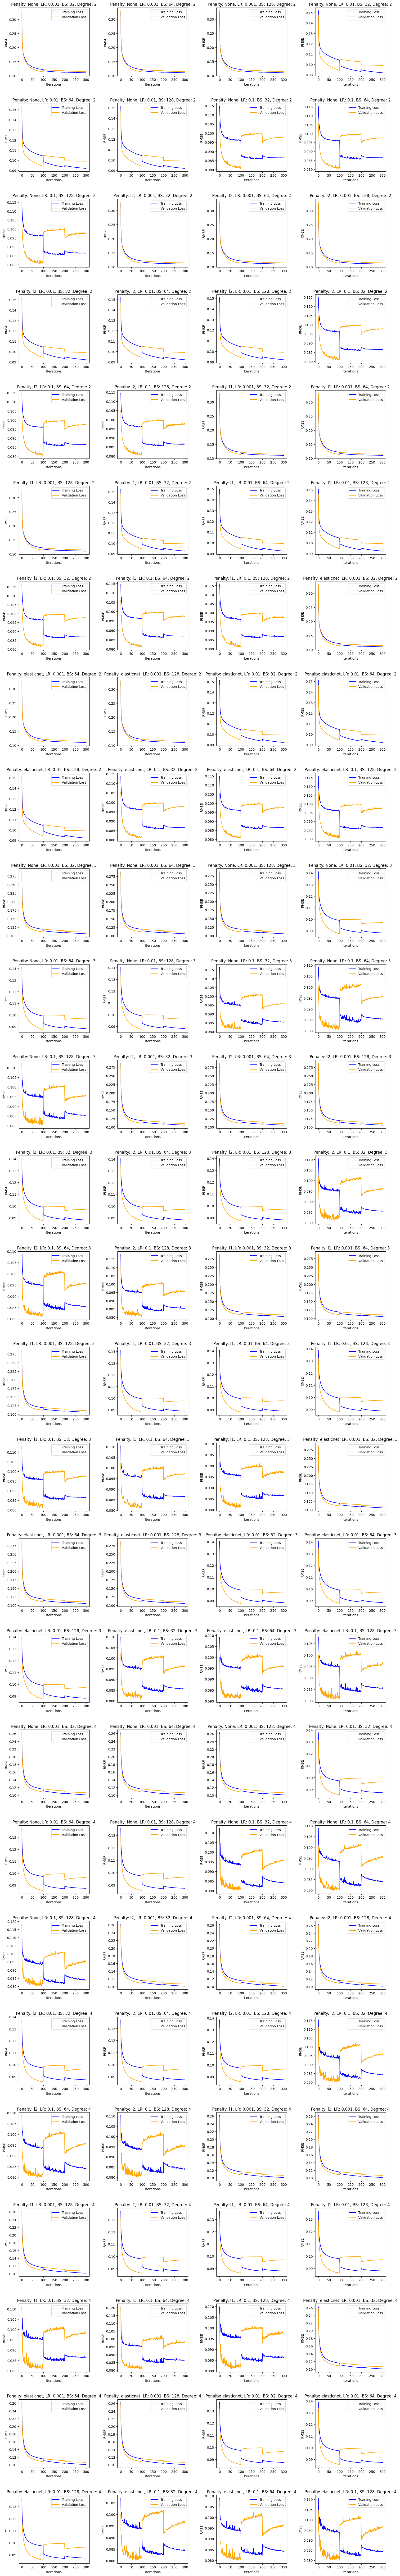

Best hyperparameters - Batch Size: 64, Learning Rate: 0.1, Penalty: None, Degree: 4
Best validation RMSE: 0.0919


In [129]:
# SGD models with different penalties and hyperparameters
penalties = [None, 'l2', 'l1', 'elasticnet']
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
degrees = [2, 3, 4]

kf = KFold(n_splits=3)

# Initialize variables to track the best hyperparameters
best_batch_size = None
best_lr = None
best_penalty = None
best_degree = None
best_val_rmse = np.inf  # For best RMSE comparison

# Store all losses for plotting
all_train_losses = {penalty: {lr: [] for lr in learning_rates} for penalty in penalties}
all_val_losses = {penalty: {lr: [] for lr in learning_rates} for penalty in penalties}

# Calculate the total number of subplots
total_plots = len(penalties) * len(learning_rates) * len(batch_sizes) * len(degrees)

# Adjust the number of rows and columns
rows = total_plots // len(penalties)  # Calculate rows needed based on penalties
cols = len(penalties)

# Prepare the grid for the plots
fig, axes = plt.subplots(rows, cols, figsize=(20, 140))  # Increase height to 140
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Function to train and evaluate a model with given parameters
def train_and_evaluate_sgd_poly(model, X_train, y_train, learning_rate, batch_size, penalty, degree, ax):
    model.set_params(eta0=learning_rate)

    train_losses = []
    val_losses = []

    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Apply polynomial feature transformation
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train_fold)
        X_val_poly = poly.transform(X_val_fold)

        # Train model in batches
        for epoch in range(100):  # epochs
            for i in range(0, len(X_train_poly), batch_size):
                end = i + batch_size
                X_batch = X_train_poly[i:end]
                y_batch = y_train_fold[i:end]
                model.partial_fit(X_batch, y_batch)

            # Predict and evaluate on training set
            y_train_pred = model.predict(X_train_poly)
            train_loss = np.sqrt(mean_squared_error(y_train_fold, y_train_pred))
            train_losses.append(train_loss)

            # Predict and evaluate on validation set
            y_val_pred = model.predict(X_val_poly)
            val_loss = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
            val_losses.append(val_loss)

    # Return average validation loss across all folds
    avg_val_loss = np.mean(val_losses)

    # Update plots for this hyperparameter combination
    ax.plot(train_losses, label='Training Loss', color='blue')
    ax.plot(val_losses, label='Validation Loss', color='orange')
    ax.set_title(f'Penalty: {penalty}, LR: {learning_rate}, BS: {batch_size}, Degree: {degree}')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('RMSE')
    ax.legend()

    return avg_val_loss

# Keep track of subplot index
subplot_idx = 0

# Iterate through all combinations of hyperparameters
for degree in degrees:
    for penalty in penalties:
        for learning_rate in learning_rates:
            for batch_size in batch_sizes:
                # Create the SGDRegressor model with the given penalty
                sgd_model = SGDRegressor(penalty=penalty, max_iter=1, tol=None, warm_start=True)
                print(f'Training with Penalty: {penalty}, LR: {learning_rate}, Batch size: {batch_size}, Degree: {degree}')

                # Pass the correct subplot axis to the function
                ax = axes.flatten()[subplot_idx]  # Ensure unique subplot for each combo

                # Train the model and get the validation loss (RMSE)
                val_rmse = train_and_evaluate_sgd_poly(sgd_model, X_train_scaled, y_train_scaled, learning_rate, batch_size, penalty, degree, ax)

                # Update the best hyperparameters if current val_rmse is lower
                if val_rmse < best_val_rmse:
                    best_val_rmse = val_rmse
                    best_batch_size = batch_size
                    best_lr = learning_rate
                    best_penalty = penalty
                    best_degree = degree

                # Move to the next subplot
                subplot_idx += 1

# Show the plots
plt.show()

# Print the best hyperparameters and corresponding validation RMSE
print(f"Best hyperparameters - Batch Size: {best_batch_size}, Learning Rate: {best_lr}, Penalty: {best_penalty}, Degree: {best_degree}")
print(f"Best validation RMSE: {best_val_rmse:.4f}")


In [130]:
print(f"Best validation RMSE from Part E: {min(results[best_params][1])}")

Best validation RMSE from Part E: 0.11376789136484265


F: **Model Description**

Polynomial Degree: 4

Best Hyperparameters: Batch Size: 64, Learning Rate: 0.1,

Penalty: None

Best Validation RMSE: 0.0919

**Analysis of Overfitting/Underfitting**
- **Training vs. Validation Loss**:
The graphs show that the training loss decreases consistently, indicating that the model is learning well from the training data.
The validation loss closely follows the training loss, suggesting that the model generalizes well to unseen data.

- **No Penalty**:
The absence of a penalty term indicates that regularization was not necessary to achieve good performance.
This suggests that the model complexity (degree 4 polynomial) was appropriate for capturing the underlying patterns without overfitting.

- **Learning Rate and Batch Size**:
A learning rate of 0.1 allowed for rapid convergence without overshooting.
A batch size of 64 provided a good balance between stability and convergence speed.

**Model Performance**
The low validation RMSE indicates strong performance and suggests that the model effectively captures non-linear relationships in the data.
Degree 4 polynomial regression provided the flexibility needed to fit complex patterns without introducing significant overfitting.

## G. Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.

In [131]:
# Reinitialize the best model using the chosen hyperparameters
best_model = SGDRegressor(penalty='l2', max_iter=1, tol=None, eta0 = 0.1, warm_start=True)

# Apply polynomial feature transformation to the training data based on the best degree
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train_scaled)

# Train the model on the full training dataset
for epoch in range(100):  # 100 epochs as before
    for i in range(0, len(X_train_poly), best_batch_size):
        end = i + best_batch_size
        X_batch = X_train_poly[i:end]
        y_batch = y_train_scaled[i:end]
        best_model.partial_fit(X_batch, y_batch)

# Apply polynomial transformation to the test set
X_test_poly = poly.transform(X_test_scaled)

# Make predictions on the test set
y_test_pred = best_model.predict(X_test_poly)

# Calculate RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test_scaled, y_test_pred))
print(f'Test RMSE: {test_rmse:.4f}')

Test RMSE: 0.0971


G: **Analysis**
- **Model Complexity**:
Using a polynomial degree of 4 allowed the model to capture complex patterns in the data, which improved accuracy over linear models.
- **Hyperparameters**:
The chosen learning rate (0.1) and batch size (64) provided a good balance between convergence speed and stability.
No penalty was used, suggesting that the model complexity was appropriate without regularization.
- **Performance**:
The Test RMSE of 0.0971 is an improvement over previous models, indicating effective generalization to unseen data.

However, there are a few areas worth exploring to potentially improve the model further:
- **Ensemble Methods**: Consider combining predictions from multiple models (e.g., bagging or boosting) to improve robustness and accuracy.
- **Cross-Validation**: Use more folds in cross-validation to ensure stability and reliability of the model evaluation.
- **Learning Rate**: Implement learning rate decay or adaptive learning rates to potentially enhance convergence behavior.